In [86]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [87]:
from IPython.display import display, Math #display(Math("f^{'}c="+str(fpc))), debido a que el print no funciona con latex
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# CURVAS ESFUERZO-DEFORMACIÓN DE CONCRETO CONFINADO Y SIN CONFINAR
## Seccion Circular





## 1. Ingresar Datos

### $f^{'}c$: Resistencia a compresión del concreto no confinado (MPa) 

In [88]:
fp_c=37 
display(Math("f^{'}c="+str(fp_c)+' \,  MPa'))

<IPython.core.display.Math object>

### $\alpha$:  Factor si es diseño de estructura ($\alpha =0.85$), resistencia a cilindros ($\alpha =1$) o estructura existente ($\alpha =1.5$)

In [89]:
alpha=0.85
display(Math(r"\alpha="+str(alpha)))

<IPython.core.display.Math object>

### $f_{yh}$: Esfuerzo de fluencia del acero de confinamiento (MPa)

In [90]:
f_yh=300
display(Math("f_{yh}="+str(f_yh)+' \,  MPa'))

<IPython.core.display.Math object>

### $D$: Diametro de la columna (mm)

In [91]:
D=400
display(Math("D="+str(D)+' \,  mm'))

<IPython.core.display.Math object>

### $n$: Numero de barras longitudinales

In [92]:
n=20
display(Math("n="+str(n)))

<IPython.core.display.Math object>

### $d_b$: Diametro de la barra longitudinal (mm)

In [93]:
d_b=16
display(Math("d_b="+str(d_b)+' \,  mm'))

<IPython.core.display.Math object>

### $d_b$: Diametro del estribo (mm)

In [94]:
d_bt=10
display(Math("d_{bt}="+str(d_bt)+' \,  mm'))

<IPython.core.display.Math object>

### $s_h$: Espaciamiento de estribos (mm)

In [95]:
s_h=60
display(Math("s_h="+str(D)+' \,  mm'))

<IPython.core.display.Math object>

### $C_c$: Recubrimiento a cara de estribo

In [96]:
C_c=15
display(Math("C_c="+str(C_c)+' \,  mm'))

<IPython.core.display.Math object>

### $\varepsilon_{su}$: Deformacion ultima del acero 

In [97]:
e_su=0.12
display(Math(r"\varepsilon_{su}="+str(e_su)))

<IPython.core.display.Math object>

## 2. Calculos

### Area de una varilla longitudinal

In [98]:
A_b=(np.pi*d_b**2)/4
display(Math("A_b="+str(A_b)+' \,  mm^2'))


<IPython.core.display.Math object>

### Area total de barras longitudinales

In [99]:
A_st=n*A_b 
display(Math("A_st="+str(A_st)+' \,  mm^2'))

<IPython.core.display.Math object>

### Area de refuerzo transversal (estribo)

In [100]:
A_bt=(np.pi*d_bt**2)/4
display(Math("A_{bt}="+str(A_bt)+' \,  mm^2'))

<IPython.core.display.Math object>

### $E_{c}=4700 (\alpha f^{'}_c)^{0.5}$: Modulo de elasticidad - ACI 318 (MPa)  

In [101]:
E_c=4700*(alpha*fp_c)**0.5 #Moehle example 4.3 (justificacion del alpha)
display(Math("E_{c}="+str(E_c)+' \,  MPa'))

<IPython.core.display.Math object>

### $\varepsilon^{'}_c$: Deformacion del concreto no confinado (Rodelo et al. (2019))
<img src="Rodelo 1.png" width="500">
<img src="Rodelo 2.png" width="350">

In [102]:
ep_c=(1+25/(alpha*fp_c))*((alpha*fp_c)/E_c)
display(Math(r"\varepsilon^{'}_c ="+str(ep_c)))

<IPython.core.display.Math object>

### $d_s$: Ancho del nucleo confinado medido al eje de estribos

In [103]:
d_s=D-2*C_c-d_bt
display(Math("d_s="+str(d_s)+' \,  mm'))

<IPython.core.display.Math object>

### $\rho_s$: Cuantia volumetrica (Relacion entre volumen de refuerzo confinado y volumen del concreto en diametro $d_s$ confinado incluyendo areas de varillas)

In [104]:
P_s=(4*A_bt)/(s_h*d_s)
display(Math(r"\rho_s="+str(P_s)))

<IPython.core.display.Math object>

### $s^{'}$: Distancia interior entre estribos (entre caras)

In [105]:
sp=s_h-d_bt
display(Math(r"s^{'}="+str(sp)+' \,  mm'))

<IPython.core.display.Math object>

### $A_{c}$: Area total seccion columna (incluyendo recubrimiento) 

In [106]:
A_c=np.pi*D**2/4
display(Math(r"A_{c}="+str(A_c)+' \,  mm^2'))

<IPython.core.display.Math object>

### $\rho_{1}$: Cuantia de refuerzo longitudinal ($A_{st}/A_{c}$)

In [107]:
P_l=A_st/A_c
display(Math(r"\rho_{1}="+str(P_l)))

<IPython.core.display.Math object>

### $A_{cc}$: Area de concreto confinado en diametro $d_s$ (excluyendo area total de varillas longitudinales, $A_{st}$)

In [108]:
A_cc=np.pi*d_s**2/4-A_st
display(Math(r"A_{cc}="+str(A_cc)+' \,  mm^2'))

<IPython.core.display.Math object>

### $A_{e}$: Area efectiva

In [109]:
A_e=np.pi*(d_s-sp/2)**2/4
display(Math(r"A_{e}="+str(A_e)+' \,  mm^2'))

<IPython.core.display.Math object>

### $k_e=\frac{A_e}{A_{cc}}$: Coeficiente de confinamiento efectivo 

In [110]:
k_e=A_e/A_cc
display(Math(r"k_e="+str(k_e)))

<IPython.core.display.Math object>

### $f_l=\frac{\rho_s f_{yh}}{2}$: Esfuerzo de confinamiento (MPa)

In [111]:
f_l=(P_s*f_yh)/2
display(Math(r"f_l="+str(f_l)+' \,  MPa'))

<IPython.core.display.Math object>

### $f^{'}_l=k_e f_l$: Esfuerzo de confinamiento efectivo (MPa)

In [112]:
fp_l=k_e*f_l
display(Math(r"f^{'}_l="+str(fp_l)+' \,  MPa'))

<IPython.core.display.Math object>

### Verificacion si $f^{'}_l/f^{'}_c <1 $ 

In [113]:
coc=fp_l/fp_c
display(Math(r"f^{'}_l"+'/'+r"f^{'}_c ="+str(coc)))

<IPython.core.display.Math object>

### $f^{'}_{cc}$: Calculo de Resistencia de concreto confinado (MPa) - Mander
<img src="Resistencia concreto confinado - Mander 1988.png" width="750">

In [114]:
fp_cc=(alpha*fp_c)*(-1.254+2.254*(1+(7.94*fp_l)/fp_c)**0.5-2*fp_l/fp_c)
display(Math(r"f^{'}_{cc} ="+str(fp_cc)+' \,  MPa'))

<IPython.core.display.Math object>

## 3. Curva esfuerzo - deformacion concreto confinado - Modelo de Mander (1988)
<img src="esfuerzo - deformacion Mander.png" width="750">


### $\varepsilon^{'}_{cc}$: Deformacion del concreto confinado

In [115]:
ep_cc=ep_c*(1+5*(fp_cc/(alpha*fp_c)-1)) #Moehle example 4.3 (justificacion del alpha)
display(Math(r"\varepsilon^{'}_{cc} ="+str(ep_cc)))

<IPython.core.display.Math object>

### $E_{sec}$: Modulo secante

In [116]:
E_sec=fp_cc/ep_cc
display(Math(r"E_{sec} ="+str(E_sec)+' \,  MPa'))

<IPython.core.display.Math object>

### $r$: Parametro r

In [117]:
r=E_c/(E_c-E_sec)
display(Math(r"r ="+str(r)))

<IPython.core.display.Math object>

### $\varepsilon_{cu}$: Deformacion en compresion del concreto confinado cuando ocurre la fractura del refuerzo transversal
<img src="ecu concreto cuando rompe estribo - Priestley.png" width="500">

In [118]:
e_cu=0.004+(1.4*P_s*f_yh*e_su)/fp_cc
display(Math(r"\varepsilon_{cu} ="+str(e_cu)))

<IPython.core.display.Math object>

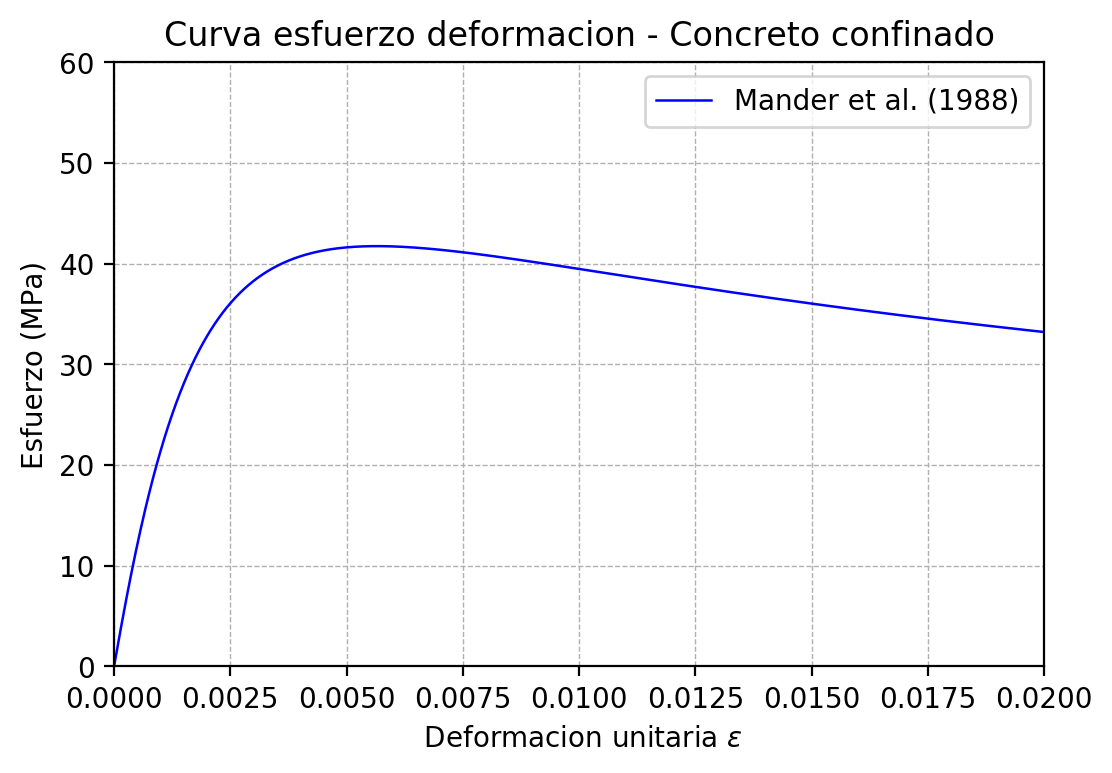

In [119]:
fig1= plt.figure(dpi=200)# Get an empty figure
curva = fig1.add_subplot(1,1,1)


deform1=np.linspace(0,0.050,3000)

deform_Mander=deform1[deform1<=(e_cu)]

x=deform_Mander/ep_cc

esf_Mander=(fp_cc*x*r)/(r-1+x**r)

curva.plot(deform_Mander,esf_Mander,lw=0.9,color='b', label='Mander et al. (1988)') 

curva.set_title('Curva esfuerzo deformacion - Concreto confinado')
a=curva.set_xlabel(r' Deformacion unitaria $\varepsilon$')
curva.set_ylabel(r'Esfuerzo (MPa)')
#Sa_prom.yaxis.set_label_coords(-0.090,0.5)
curva.set_xlim(0,0.02)
curva.set_ylim(0,60)                
curva.grid(linestyle="--", linewidth=0.5) 
curva.legend(loc='upper right')

fig1.savefig("Curva concreto confinado - Curva Mander (1988).png", bbox_extra_artists=(a,), bbox_inches='tight')

## 4. Curva esfuerzo - deformacion monotonica del concreto no confinado - Modelo de Chang y Mander (1994)
<img src="Chang y Mander - concreto no confinado.png" width="750">

### $\varepsilon^{'}_c$

In [120]:
ep_c_chang=(alpha*fp_c)**0.25/1150
display(Math(r"\varepsilon^{'}_c ="+str(ep_c_chang)))


<IPython.core.display.Math object>

### $E_c$ Modulo de Elasticidad inicial recomendado por Chang y Mander - pag.98

In [121]:
E_c_chang=8200*(alpha*fp_c)**(3/8)
display(Math(r"E_c ="+str(E_c_chang)))

<IPython.core.display.Math object>

### $E_c$ Modulo de Elasticidad inicial recomendado por Chang y Mander - pag.98

In [122]:
E_sec_chang=fp_c/ep_c_chang
display(Math(r"E_{sec} ="+str(E_sec_chang)))

<IPython.core.display.Math object>

### n

In [123]:
n_chang=E_c_chang/E_sec_chang
display(Math(r"n ="+str(n_chang)))

<IPython.core.display.Math object>

### r

In [124]:
r_chang=(alpha*fp_c)/5.2-1.9
display(Math(r"r ="+str(r_chang)))

<IPython.core.display.Math object>

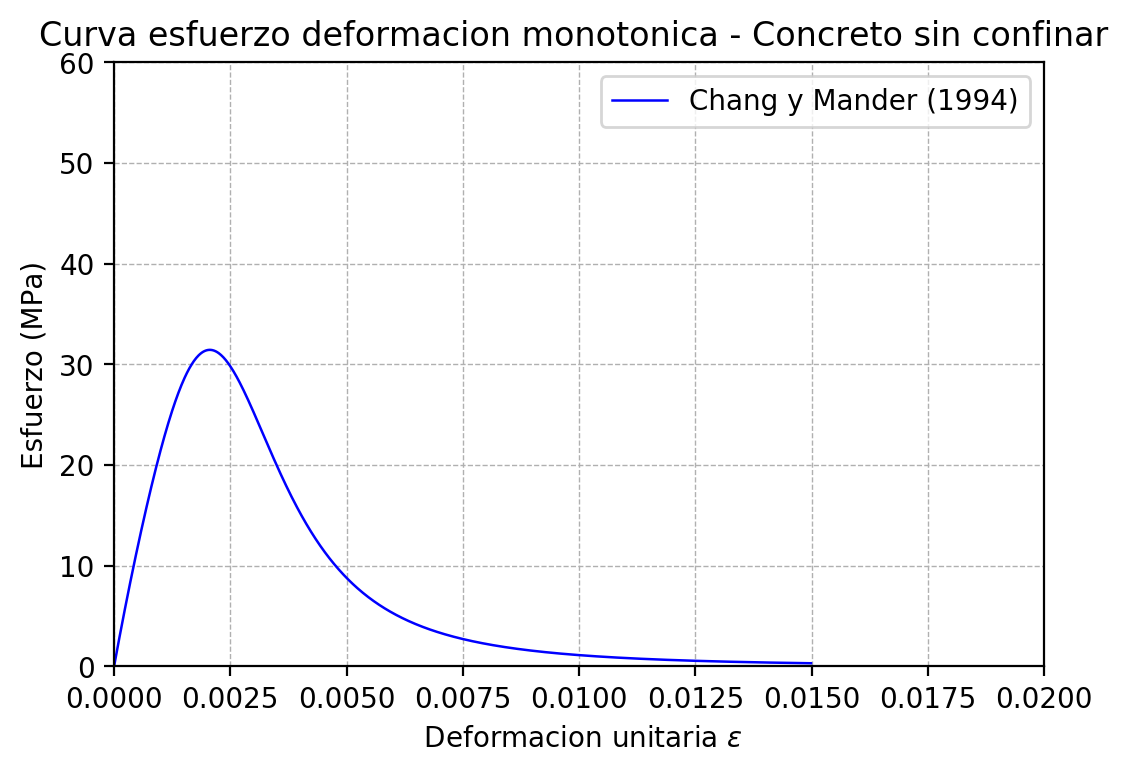

In [125]:
#CHANG Y MANDER ET AL. (1994)
fig1= plt.figure(dpi=200)# Get an empty figure
curva = fig1.add_subplot(1,1,1)




deform1=np.linspace(0,0.050,3000)
def_ultima=0.015 #A criterio...
deform_Chang=deform1[deform1<=(def_ultima)]


x=deform_Chang/ep_c_chang


esf_Chang=(alpha*fp_c)*((n_chang*x)/(1+(n_chang-r_chang/(r_chang-1))*x+(x**r_chang)/(r_chang-1)))


curva.plot(deform_Chang,esf_Chang,lw=0.9,color='b', label='Chang y Mander (1994)') 

curva.set_title('Curva esfuerzo deformacion monotonica - Concreto sin confinar ')
a=curva.set_xlabel(r' Deformacion unitaria $\varepsilon$')
curva.set_ylabel(r'Esfuerzo (MPa)')
#Sa_prom.yaxis.set_label_coords(-0.090,0.5)
curva.set_xlim(0,0.02)
curva.set_ylim(0,60)                
curva.grid(linestyle="--", linewidth=0.5) 
curva.grid(linestyle="--", linewidth=0.5) 
curva.legend(loc='upper right')

fig1.savefig("Curva concreto sin confinar - Chang y Mander (1994).png", bbox_extra_artists=(a,), bbox_inches='tight')

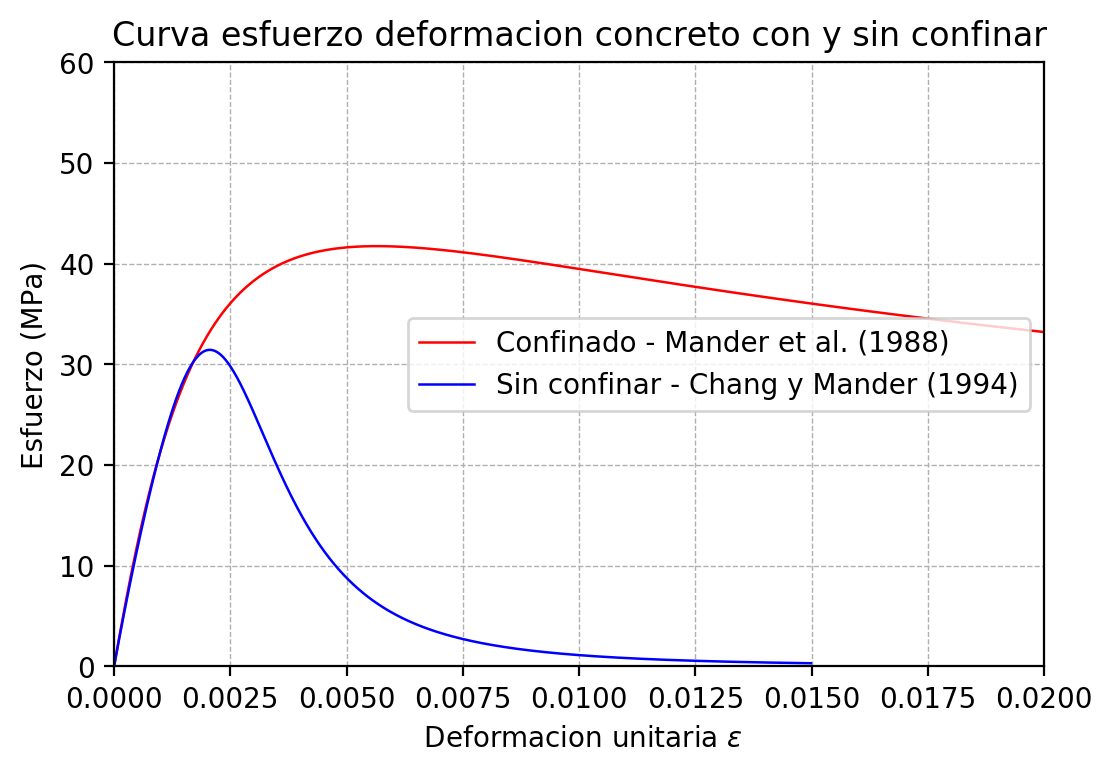

In [126]:
#CHANG Y MANDER ET AL. (1994)
fig1= plt.figure(dpi=200)# Get an empty figure
curva = fig1.add_subplot(1,1,1)

curva.plot(deform_Mander,esf_Mander,lw=0.9,color='r', label='Confinado - Mander et al. (1988)') 
curva.plot(deform_Chang,esf_Chang,lw=0.9,color='b', label='Sin confinar - Chang y Mander (1994)') 


curva.set_title('Curva esfuerzo deformacion concreto con y sin confinar')
a=curva.set_xlabel(r' Deformacion unitaria $\varepsilon$')
curva.set_ylabel(r'Esfuerzo (MPa)')
#Sa_prom.yaxis.set_label_coords(-0.090,0.5)
curva.set_xlim(0,0.02)
curva.set_ylim(0,60)                
curva.grid(linestyle="--", linewidth=0.5) 
curva.grid(linestyle="--", linewidth=0.5) 
curva.legend(loc='center right')

fig1.savefig("Comparacion curva concreto confinado y sin confinar.png", bbox_extra_artists=(a,), bbox_inches='tight')

In [127]:
from IPython.display import HTML

HTML('''<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, by Lino Eduardo Vilchez Deza.
</footer>''')